Cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)

Sample counts per class:
malignant: 212
benign: 357

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Sample data:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
66         9.465         21.01           60.11      269.4          0.10440   
334       12.300         19.02           77.88     

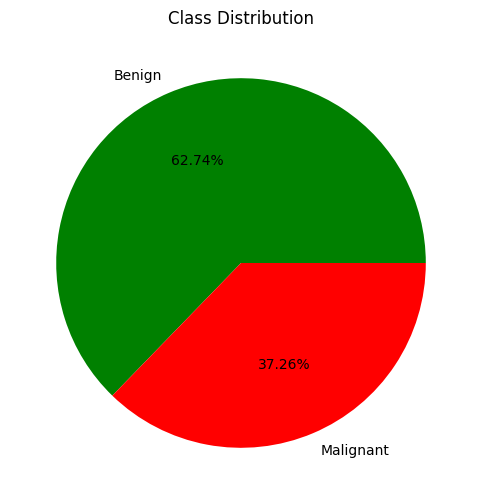


Training set size: (381, 30)
Test set size: (188, 30)

KNN MODEL
Training accuracy: [1.0, 0.9868766404199475, 0.984251968503937, 0.984251968503937, 0.9763779527559056, 0.979002624671916, 0.9711286089238845, 0.9763779527559056, 0.973753280839895, 0.979002624671916]
Test accuracy: [0.9414893617021277, 0.9361702127659575, 0.9574468085106383, 0.9521276595744681, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9680851063829787, 0.9627659574468085]


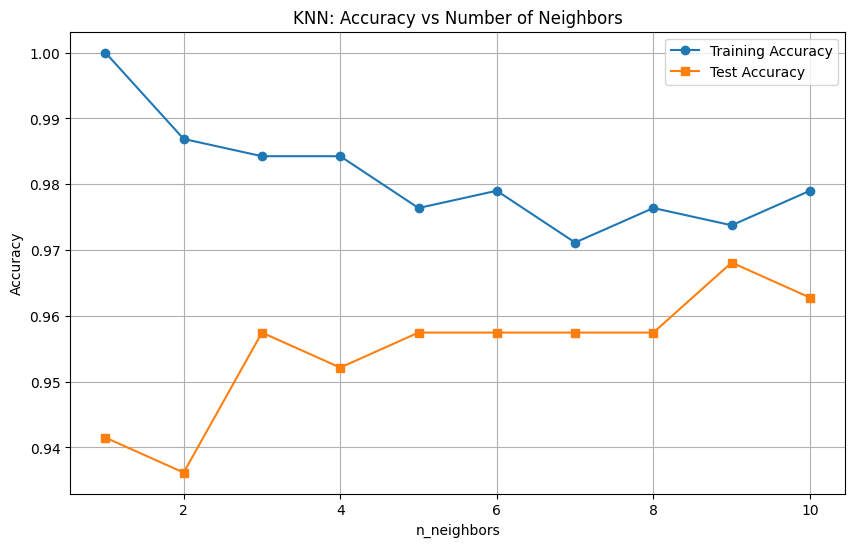


LOGISTIC REGRESSION MODEL
First 15 predictions: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1]
Actual first 15 values: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1]

Logistic Regression Accuracy: 97.87%

--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.96      0.99      0.97        67
      benign       0.99      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188


--- Confusion Matrix ---
[[ 66   1]
 [  3 118]]


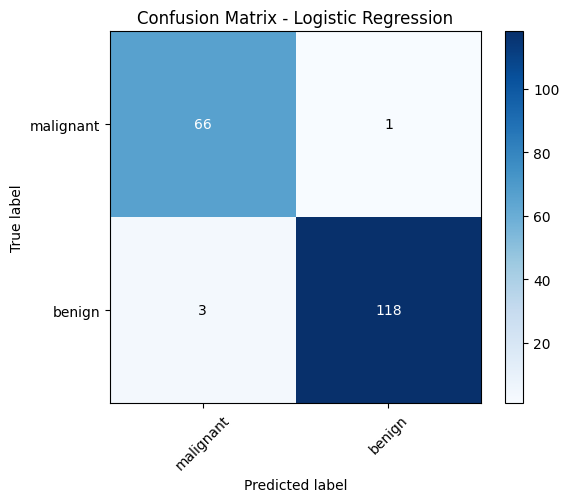


MODEL COMPARISON
KNN (k=6) Accuracy: 95.74%
Logistic Regression Accuracy: 97.87%


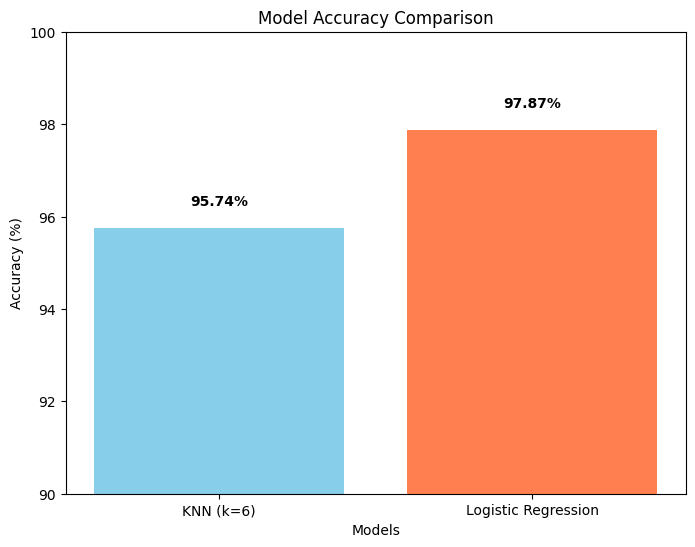

In [1]:
# -*- coding: utf-8 -*-
"""Cancerproject.ipynb
Automatically generated by Colab.
Original file is located at
    https://colab.research.google.com/drive/1juWiix7w5KXtxdmsaRvXCZyJciwgax2z
"""

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  # Added
from sklearn.preprocessing import StandardScaler  # Added for scaling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
cancer = load_breast_cancer()
print("Cancer.keys():\n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))

# Sample counts
print("\nSample counts per class:")
for name, count in zip(cancer.target_names, np.bincount(cancer.target)):
    print(f"{name}: {count}")

print("\nFeature names:\n{}".format(cancer.feature_names))

# Create DataFrame for exploration
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print("\nSample data:")
print(df.sample(5))
print("\nDataset info:")
df.info()
print("\nStatistical summary:")
print(df.describe())

# Target distribution
df2 = pd.DataFrame(cancer.target, columns=['target'])
class_counts = df2["target"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Benign', 'Malignant'], autopct='%1.2f%%', colors=['green', 'red'])
plt.title("Class Distribution")
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.33, random_state=42
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Feature Scaling (Important for Logistic Regression!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== KNN Model (Original) =====
print("\n" + "="*50)
print("KNN MODEL")
print("="*50)

training_accuracy = []
test_accuracy = []

for neighbour in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train_scaled, y_train)
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled, y_test))

print(f"Training accuracy: {training_accuracy}")
print(f"Test accuracy: {test_accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_accuracy, label="Training Accuracy", marker='o')
plt.plot(range(1, 11), test_accuracy, label="Test Accuracy", marker='s')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN: Accuracy vs Number of Neighbors")
plt.legend()
plt.grid(True)
plt.show()

# ===== LOGISTIC REGRESSION MODEL (NEW) =====
print("\n" + "="*50)
print("LOGISTIC REGRESSION MODEL")
print("="*50)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
print(f"First 15 predictions: {y_pred_lr[:15]}")
print(f"Actual first 15 values: {y_test[:15]}")

# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# Detailed Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_lr, target_names=cancer.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("\n--- Confusion Matrix ---")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, cancer.target_names, rotation=45)
plt.yticks(tick_marks, cancer.target_names)

# Add text annotations
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ===== MODEL COMPARISON =====
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# Best KNN (k=6 typically performs well)
best_knn = KNeighborsClassifier(n_neighbors=6)
best_knn.fit(X_train_scaled, y_train)
knn_accuracy = best_knn.score(X_test_scaled, y_test)

print(f"KNN (k=6) Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# Bar chart comparison
models = ['KNN (k=6)', 'Logistic Regression']
accuracies = [knn_accuracy * 100, lr_accuracy * 100]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'coral'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison')
plt.ylim([90, 100])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')
plt.show()
